# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict 'Percentage' using an appropriate predictor variable.

In [96]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## 1. Reading & Understanding data

In [97]:
# Reading from URL
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [98]:
data.shape

(25, 2)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [100]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We understand that the data contains columns 'Hours' and 'Scores' of 25 students and there are no null values.

## 2. Visualising the Data

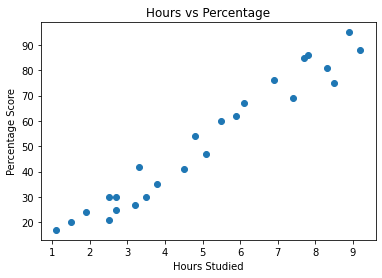

In [101]:
plt.scatter(data.Hours,data.Scores)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [102]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


As per the graph above and the correlation score, it can be observed that there is a strong positive correlatonof 0.97 times between Hours and Percentage Scores

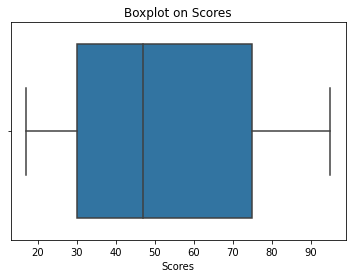

In [103]:
sns.boxplot(data.Scores)
plt.title('Boxplot on Scores')  
plt.show()

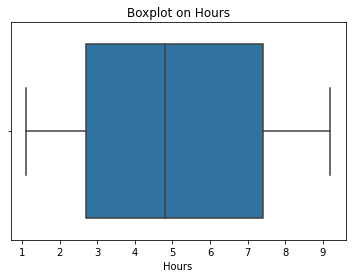

In [104]:
sns.boxplot(data.Hours)
plt.title('Boxplot on Hours')  
plt.show()

It can also be understood from the above box-plots that there are no outliers in Hours and Score

## 3.Data Preparation

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, 'Hours', in this case, to the variable 'X' and the response variable, 'Scores', to the variable 'y'.

In [105]:
X = data['Hours']
y = data['Scores']

#### Test-Train Split

In [106]:
# Importing relevant library & Splitting data as Test-train at 80:20 percentage

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [107]:
# Let's now take a look at the train dataset

X_train.head()

19    7.4
23    6.9
21    4.8
6     9.2
12    4.5
Name: Hours, dtype: float64

In [108]:
y_train.head()

19    69
23    76
21    54
6     88
12    41
Name: Scores, dtype: int64

## 4. Model Building

In [109]:
# importing the 'statsmodel.api' library for performing the linear regression.

import statsmodels.api as sm

By default, the 'statsmodels' library fits a line on the dataset which passes through the origin. But in order to have an intercept, we need to manually use the 'add_constant' attribute of 'statsmodels'. And once we've added the constant to the 'X_train' dataset, we can go ahead and fit a regression line using the 'OLS' (Ordinary Least Squares) attribute of 'statsmodels' as shown below

In [110]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [111]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.989423
Hours    9.835444
dtype: float64

In [39]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     356.7
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           2.59e-13
Time:                        13:21:38   Log-Likelihood:                -62.724
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9894      3.106      0.641      0.5

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Hours is 9.84, with a very low p value of 0
The coefficient is statistically significant. So the association is not purely by chance.

##### 2. R - squared is 0.952
Meaning that 95.2% of the variance in 'Profit' is explained by 'Hours'

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Scores = 1.9894 + 9.8354 \times Hours $

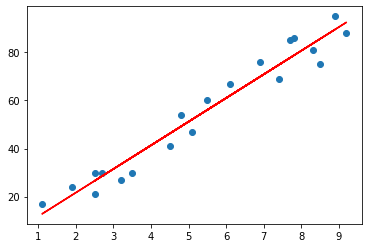

In [112]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.9894 + 9.8354*X_train, 'r')
plt.show()

As per chart above, the Regression line is good fit to the data

## 5. Prediction on Test set

In [113]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [114]:
y_pred.head()

9     28.545123
22    39.364112
13    34.446390
11    60.018545
5     16.742590
dtype: float64

In [115]:
# Importing relevant libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [116]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

4.543287018366106

###### Checking the R-squared on the test set

In [117]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9050356232459791

##### Visualizing the fit on the test set

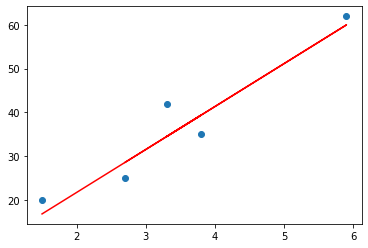

In [118]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

In [119]:
# Comparing actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


In [120]:
# Testing the prediction
hours = 9.25
Prediction = 1.9894 + (9.8354 * hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(Prediction))

No of Hours = 9.25
Predicted Score = 92.96685000000001
